# 2_2 . Analysis of generated TE annotation
Manuel Jara-Espejo$^{1}$\
Aboobaker lab, Department of Biology, University of Oxford

## Contents of notebook
1. Introduction
2. Representation of TE families comparison between *Phaw5.0* and *Phaw5.1* assemblies

### 1. Introducion

### 2. Representation of TE families comparison between *Phaw5.0* and *Phaw5.1* assemblies

In [1]:
library(tidyr)
library(tidyverse)
library(dplyr)
library(reshape2)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ dplyr   1.0.5
✔ tibble  3.1.1     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘reshape2’ was built under R version 4.0.5”

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [5]:
directory= "/drives/ssd1/manuel/phaw/2022_analysis/te_analysis/"
#setwd(directory)

#Create a dataframe containing the percenatge and number of TEs per families. Numbers were extracted from statitsic output files generated by RepeatMasker.
#For Phaw5.1 the data is in:/drives/raid/AboobakerLab/manuel/data_phaw_analysis/repeats_gapFilledAsm/phaw_sambaAsm.scaff_seqs_editedScafNames.fa.tbl

class <- c("SINE","LINE","LTR","DNA","Rolling-circles","Small-RNA","Satellites", "Simple-repeats","Low-complexity","Unclassified")
phaw_5.0perc <- c(0.01,8.07,0.23,3.54, 0.20, 0.02, 0.03, 0.50, 0.03, 32.16)
phaw5.0_count <- c(643, 636855, 15816, 293942, 25186, 2573, 1741, 262361, 15048, 4417347)
phaw_5.1perc <- c(0.0,11.78,0.91,4.23, 0.18, 0.00, 0.02, 0.65, 0.03, 38.75)
phaw_5.1_count <- c(0.0,644713,47932,315692, 40890, 0.00, 4697, 323041, 17107, 4775697)

repetitions <- data_frame(class,phaw_5.0perc,phaw5.0_count,phaw_5.1perc,phaw_5.1_count)
repetitions

class,phaw_5.0perc,phaw5.0_count,phaw_5.1perc,phaw_5.1_count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
SINE,0.01,643,0.00,0
LINE,8.07,636855,11.78,644713
LTR,0.23,15816,0.91,47932
DNA,3.54,293942,4.23,315692
Rolling-circles,0.20,25186,0.18,40890
Small-RNA,0.02,2573,0.00,0
Satellites,0.03,1741,0.02,4697
Simple-repeats,0.50,262361,0.65,323041
Low-complexity,0.03,15048,0.03,17107


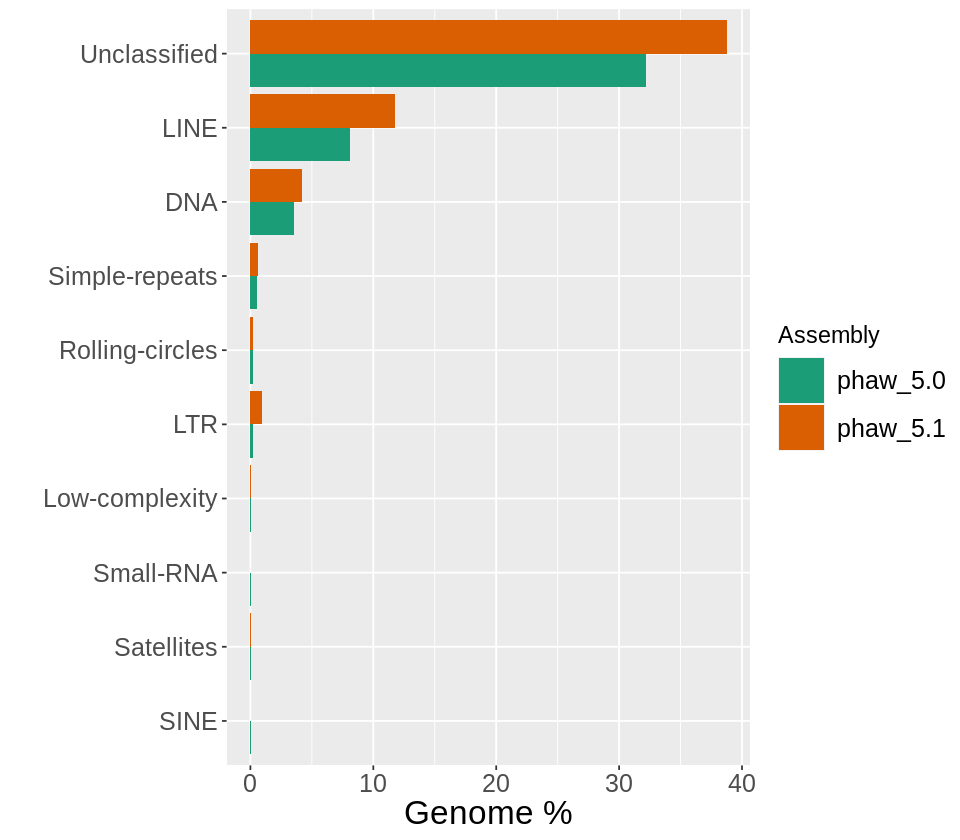

In [15]:
#Plot results
options(repr.plot.width=8, repr.plot.height=7)

repetitions %>% melt(id.vars = c("class"))  %>%   filter(grepl("perc",variable)) %>% rename(temp = variable) %>% 
mutate(Assembly= gsub("perc","",temp)) %>%
mutate(class= factor(class,levels = rev(c("Unclassified","LINE","DNA","Simple-repeats","Rolling-circles","LTR","Low-complexity","Small-RNA","Satellites","SINE")))) %>%
ggplot(aes(x=class, y=value, fill=Assembly)) +
    geom_bar(stat='identity', position='dodge') + coord_flip() +
scale_fill_brewer(palette="Dark2")+
scale_color_brewer(palette="Dark2") +
ylab("Genome %") + xlab("") +
  theme(axis.title =element_text(size=20),
        axis.text = element_text(size=15),
        legend.text = element_text(size = 15), 
        legend.title = element_text(size = 14), 
        legend.key.size = unit(1, 'cm'))